In [1]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv("/Users/boitumelomaseko/Data Science/Projects/Credit Card/artifacts/training_dataset.csv")
data.shape

(270566, 31)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,84558.0,1.225896,-0.559735,0.748132,-0.899091,-1.176249,-0.359097,-0.824614,0.254095,1.901373,...,-0.006633,0.093979,-0.064239,-0.035617,0.443813,-0.676337,0.075715,0.017241,1.00,0
1,43575.0,-0.316250,0.973117,0.819911,-0.212413,0.603125,0.038185,0.542425,0.192143,-0.163004,...,-0.314296,-0.850765,-0.093547,-1.015952,-0.135989,0.167666,0.253151,0.082388,4.49,0
2,142280.0,2.113127,-0.025811,-1.341639,0.248042,0.242917,-0.805679,0.206122,-0.321813,0.505600,...,-0.328919,-0.780767,0.248977,-0.639701,-0.187189,0.237040,-0.067867,-0.065920,0.89,0
3,55335.0,1.222559,0.262690,0.115831,0.566754,-0.026937,-0.396594,0.005081,-0.038370,0.068277,...,-0.279870,-0.794678,0.108408,-0.328816,0.184750,0.145903,-0.009294,0.024966,9.99,0
4,35963.0,-5.263760,-6.321337,0.071344,0.149963,3.436535,-4.037193,-2.685129,0.671619,-1.287235,...,0.991033,0.468536,0.079092,0.636338,-0.279928,-0.429728,0.352316,-0.810679,108.00,0


In [4]:
data['Class'].value_counts()

Class
0    270099
1       467
Name: count, dtype: int64

In [5]:
round(data.Class.value_counts()/len(data)*100,2)

Class
0    99.83
1     0.17
Name: count, dtype: float64

Note: Highly disproportionate dataset. Models are will try to discount the lesser class and will find it difficult to detect fraudulent cases. This is what I should confront. 

In [6]:
def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage
    
    Parameters:
    df (DataFrame): Dataframe to check
    
    Returns:
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0]/len(df)
    null_values.columns = ['null_count','null_pct']
    return null_values

nulls_summary_table(data)

,null_count,null_pct
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


No null values on this dataset. 

<Axes: >

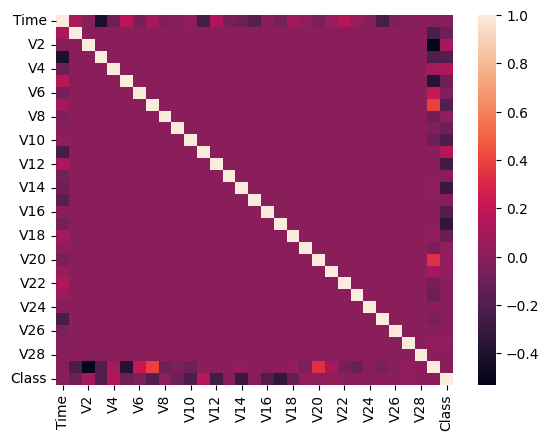

In [7]:
sns.heatmap(data.corr())

In [8]:
df_corr = pd.DataFrame(round(data.corr(),3))

In [9]:
df_corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,0.117,-0.011,-0.420,-0.106,0.174,-0.063,0.085,-0.036,-0.008,...,0.045,0.144,0.051,-0.016,-0.233,-0.041,-0.005,-0.009,-0.011,-0.012
V1,0.117,1.000,-0.002,0.001,0.000,0.002,-0.001,0.001,0.000,0.001,...,0.000,-0.000,0.001,-0.000,-0.001,-0.000,0.000,-0.004,-0.227,-0.103
V2,-0.011,-0.002,1.000,-0.002,0.001,0.001,-0.001,0.000,0.000,-0.001,...,0.004,-0.001,0.001,0.001,-0.002,-0.001,0.001,-0.005,-0.530,0.092
V3,-0.420,0.001,-0.002,1.000,-0.000,0.000,-0.000,0.002,0.000,-0.000,...,0.001,-0.000,0.001,0.000,-0.000,-0.001,-0.000,-0.001,-0.210,-0.196
V4,-0.106,0.000,0.001,-0.000,1.000,-0.000,0.000,-0.001,-0.001,-0.000,...,-0.002,0.000,0.000,0.001,0.001,0.000,-0.001,0.001,0.098,0.135
V5,0.174,0.002,0.001,0.000,-0.000,1.000,0.002,0.005,-0.001,-0.001,...,0.001,-0.000,0.002,-0.000,0.000,0.000,-0.002,0.001,-0.385,-0.097
V6,-0.063,-0.001,-0.001,-0.000,0.000,0.002,1.000,-0.002,0.001,0.000,...,0.002,-0.000,-0.002,-0.000,-0.001,-0.000,0.001,-0.001,0.216,-0.044
V7,0.085,0.001,0.000,0.002,-0.001,0.005,-0.002,1.000,-0.001,0.001,...,-0.004,0.001,-0.002,-0.000,-0.001,-0.000,0.001,0.001,0.395,-0.191
V8,-0.036,0.000,0.000,0.000,-0.001,-0.001,0.001,-0.001,1.000,-0.002,...,-0.009,0.003,0.001,-0.001,0.001,0.000,-0.001,0.001,-0.103,0.020
V9,-0.008,0.001,-0.001,-0.000,-0.000,-0.001,0.000,0.001,-0.002,1.000,...,0.000,0.000,-0.000,0.001,-0.000,-0.000,-0.000,0.002,-0.043,-0.099


In [10]:
round(data.describe(),3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,270566.000,270566.000,270566.000,270566.000,270566.000,270566.000,270566.000,270566.000,270566.000,270566.000,...,270566.000,270566.000,270566.000,270566.000,270566.000,270566.000,270566.000,270566.000,270566.000,270566.000
mean,94804.550,0.000,0.001,0.001,0.000,-0.001,-0.000,0.000,0.000,0.000,...,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,88.247,0.002
std,47489.609,1.959,1.647,1.517,1.416,1.378,1.330,1.235,1.192,1.099,...,0.736,0.726,0.625,0.605,0.521,0.482,0.404,0.330,248.584,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54186.250,-0.920,-0.598,-0.890,-0.848,-0.692,-0.768,-0.554,-0.208,-0.643,...,-0.228,-0.543,-0.162,-0.354,-0.317,-0.327,-0.071,-0.053,5.590,0.000
50%,84692.500,0.018,0.065,0.181,-0.019,-0.055,-0.274,0.040,0.023,-0.051,...,-0.030,0.007,-0.011,0.041,0.016,-0.052,0.001,0.011,22.000,0.000
75%,139311.750,1.316,0.804,1.027,0.743,0.611,0.398,0.570,0.327,0.598,...,0.186,0.528,0.148,0.439,0.350,0.241,0.091,0.078,77.200,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


#### Assumptions

* Features V1-V28 have been scaled/normalized.
* Time and Amount have not been tampered with. 

<Axes: title={'center': 'Time plot'}, xlabel='Count', ylabel='Time'>

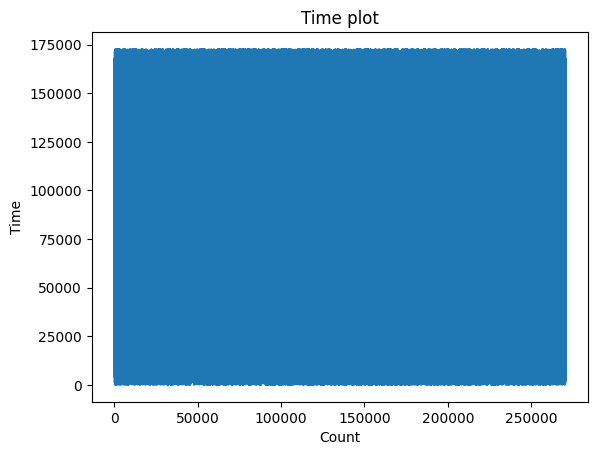

In [11]:
df = data.copy()

df['Time'].plot(title="Time plot", xlabel="Count", ylabel="Time")

<Axes: title={'center': 'Amount Boxplot'}, ylabel='Values'>

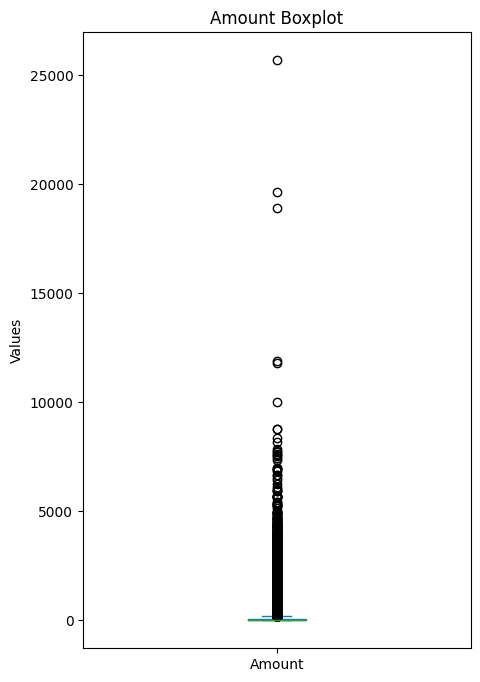

In [12]:
df['Amount'].plot(kind='box', title="Amount Boxplot", ylabel="Values", figsize=(5,8))

/var/folders/0j/9kgwgy2n3yld2hdt796pyp3w0000gn/T/ipykernel_43744/3610081977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Class", palette=["blue","red"])


Text(0.5, 1.0, 'Non-Fraud (0) vs Fraud (1)')

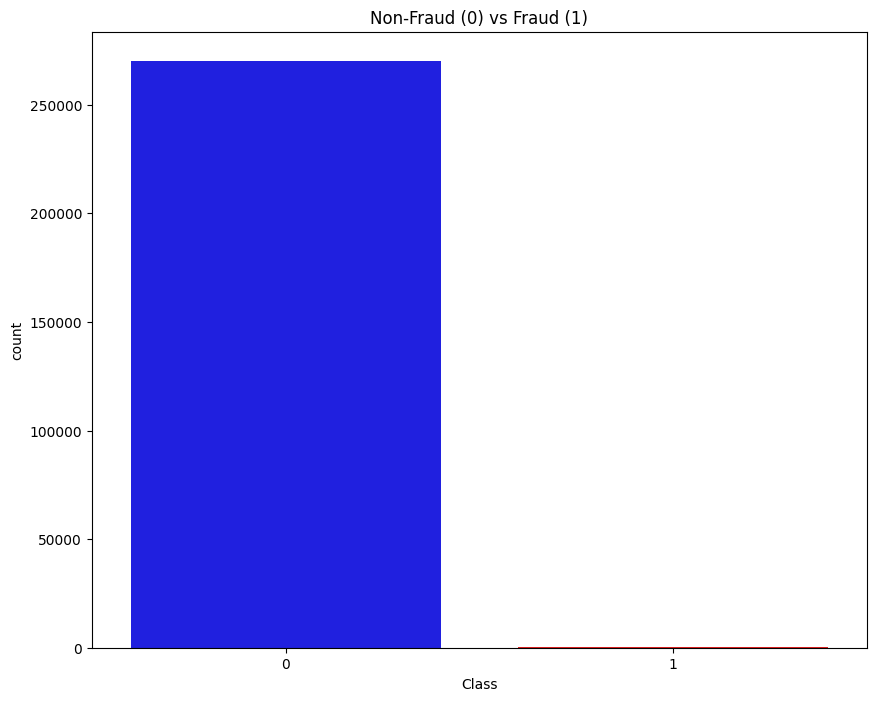

In [13]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x="Class", palette=["blue","red"])
plt.title("Non-Fraud (0) vs Fraud (1)")

<Axes: title={'center': 'Density Distribution for Amount'}, xlabel='Amount', ylabel='Density'>

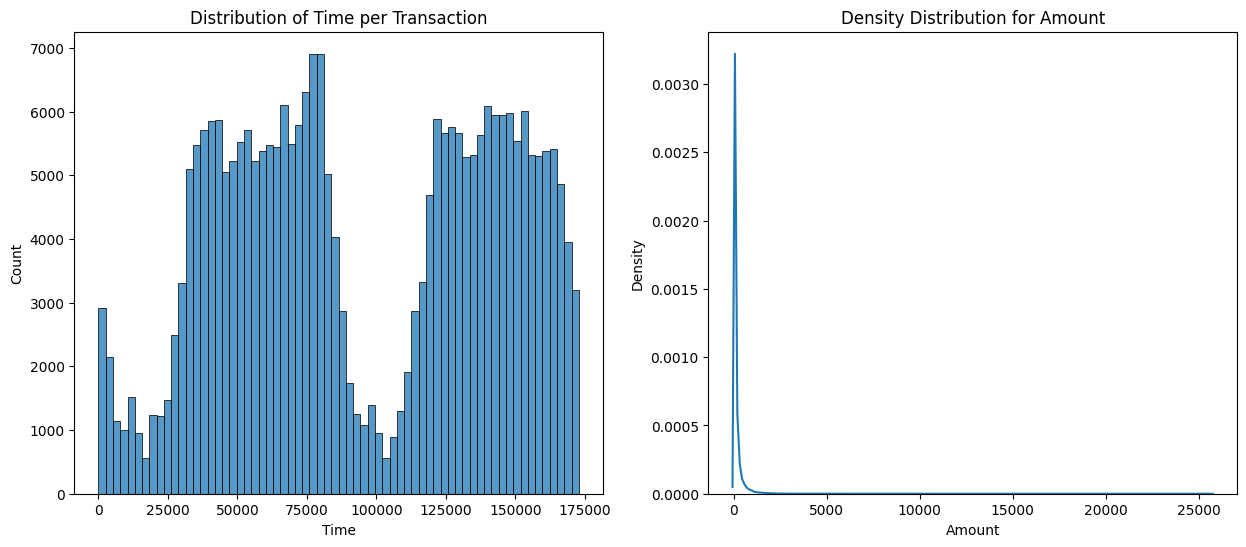

In [14]:
# Distribution plots of Time and Amount 
fig = plt.figure(figsize=(15,6))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.set_title("Distribution of Time per Transaction")

ax1.set_xlabel("Amount")
ax1.set_title("Density Distribution for Amount")

sns.histplot(data=df["Time"], ax=ax0, )
sns.kdeplot(data=df["Amount"].values, ax=ax1)

In [15]:
df["Time"].values.reshape(-1,1)

array([[ 84558.],
       [ 43575.],
       [142280.],
       ...,
       [  2937.],
       [147710.],
       [ 60764.]], shape=(270566, 1))

In [16]:
# Data scaling and balancing. 

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

time_array = df["Time"].values.reshape(-1,1)
amount_array = df["Amount"].values.reshape(-1,1)

df["Time_scaled"],df["Amount_scaled"] = scaler.fit_transform(time_array), scaler.fit_transform(amount_array)

In [17]:
df.shape

(270566, 33)

In [18]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_scaled', 'Amount_scaled'],
      dtype='object')

In [19]:
df.drop(columns=["Time", "Amount"], axis=1, inplace=True)

In [20]:
df["Class"].value_counts()

Class
0    270099
1       467
Name: count, dtype: int64

In [21]:
# Splitting the data

X_1 = df.copy()
y_1 = X_1.pop("Class")

In [22]:
y_1.sum()

np.int64(467)

In [23]:
X_1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time_scaled,Amount_scaled
0,1.225896,-0.559735,0.748132,-0.899091,-1.176249,-0.359097,-0.824614,0.254095,1.901373,-0.849036,...,-0.006633,0.093979,-0.064239,-0.035617,0.443813,-0.676337,0.075715,0.017241,-0.001580,-0.293255
1,-0.316250,0.973117,0.819911,-0.212413,0.603125,0.038185,0.542425,0.192143,-0.163004,-0.522900,...,-0.314296,-0.850765,-0.093547,-1.015952,-0.135989,0.167666,0.253151,0.082388,-0.483022,-0.244519
2,2.113127,-0.025811,-1.341639,0.248042,0.242917,-0.805679,0.206122,-0.321813,0.505600,0.058555,...,-0.328919,-0.780767,0.248977,-0.639701,-0.187189,0.237040,-0.067867,-0.065920,0.676501,-0.294791
3,1.222559,0.262690,0.115831,0.566754,-0.026937,-0.396594,0.005081,-0.038370,0.068277,-0.327019,...,-0.279870,-0.794678,0.108408,-0.328816,0.184750,0.145903,-0.009294,0.024966,-0.344873,-0.167714
4,-5.263760,-6.321337,0.071344,0.149963,3.436535,-4.037193,-2.685129,0.671619,-1.287235,0.279237,...,0.991033,0.468536,0.079092,0.636338,-0.279928,-0.429728,0.352316,-0.810679,-0.572443,1.200950


In [24]:
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_1, y_1)

In [25]:
X_resampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time_scaled,Amount_scaled
229376,1.060417,-0.299287,0.423383,0.539149,-0.632744,-0.316462,-0.253074,0.056897,0.171332,0.110412,...,0.212247,0.395671,-0.211322,0.030115,0.419920,0.485320,-0.044988,0.015889,-0.595115,0.952940
150568,-2.446581,-0.789739,0.074209,-2.815753,0.697112,-0.220339,-0.716847,1.229780,0.763806,-2.437555,...,0.373274,0.533966,-0.046418,-0.902545,-0.895070,-0.472308,-0.149568,-0.164331,-0.077010,-0.300237
209723,-0.475516,0.877926,1.403109,-0.266405,0.254866,0.063901,0.458332,0.289618,-0.504604,-0.161081,...,-0.180419,-0.499325,-0.035708,-0.351242,-0.282857,0.106710,0.271970,0.102178,-0.365549,-0.271191
160264,-10.904882,-5.535735,-2.658936,2.225414,-2.471184,1.433048,-1.202641,-9.299173,0.621437,-1.721983,...,-5.078909,1.162507,-1.076966,0.888408,0.644787,0.737527,3.063540,-1.602655,-0.493853,13.665131
79031,-2.619448,2.516909,-0.906210,-1.037300,-0.154070,-1.257057,0.797979,-0.139431,1.738366,2.492656,...,-0.477892,-0.670541,0.128373,0.016048,-0.220484,0.024858,-0.431872,-0.238886,0.709922,-0.181679


In [26]:
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)
df_resampled = df_balanced.sample(frac=1, random_state=42)
df_resampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time_scaled,Amount_scaled,Class
202750,-2.552505,-1.705605,1.996038,2.703015,1.606230,-0.903653,0.453577,-0.373634,0.020083,0.890720,...,0.309641,1.371487,0.323379,0.285560,-0.010155,-0.494952,0.080108,-0.512073,0.009915,0
107606,-2.967013,-2.408599,0.970375,-2.509918,0.454324,0.527707,-0.630929,0.120913,-1.707194,1.631025,...,0.372650,0.734514,-1.711519,0.853537,-0.042997,0.046193,-0.693625,-0.542088,0.921659,0
2700,-0.498446,0.727929,1.232917,-0.752257,0.608606,-0.177303,0.876031,-0.073569,-0.184107,-1.124417,...,0.127438,-0.341233,0.700797,0.946494,-0.246634,-0.060403,-0.049666,0.977210,0.179584,0
45813,-0.967767,2.098019,-5.222929,6.514573,-4.187674,2.114178,0.948701,-2.448427,-3.203666,-3.074034,...,0.796739,1.314312,-0.352887,-1.770706,0.098133,0.956769,0.162777,0.588267,12.614300,1
143398,-0.469327,1.111453,2.041003,1.731595,0.135147,-0.093625,0.266155,0.082988,0.580255,-0.164563,...,0.592670,-0.053596,0.320748,-0.369121,-0.136605,-0.100845,0.039347,-0.792506,-0.252339,1


<Axes: >

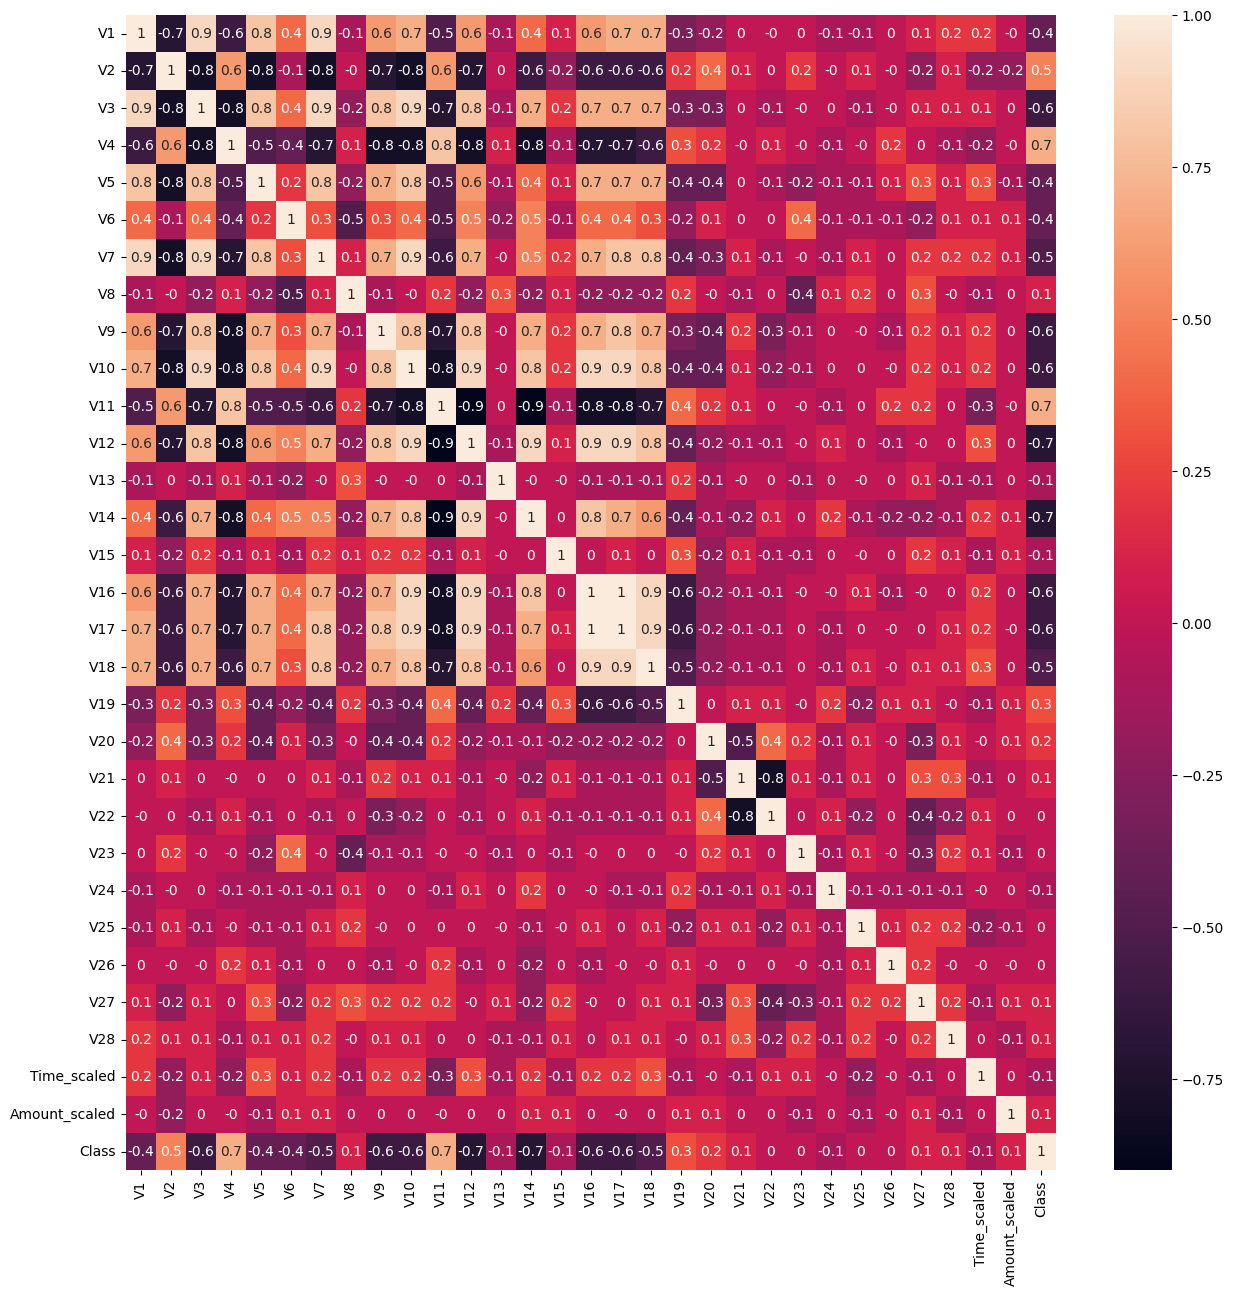

In [27]:
plt.figure(figsize=(15, 15))
sns.heatmap(round(df_resampled.corr(),1), annot=True)

In [28]:
df_balanced.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time_scaled',
       'Amount_scaled', 'Class'],
      dtype='object')

In [29]:
df_attributes = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
                'V12', 'V13', 'V14' 
                ]
for parameter in df_attributes:
    pearson_coef, p_value = stats.pearsonr(df_resampled[parameter], df_resampled['Class'])
    print(parameter)
    print('The Pearson Correlation Coefficient for ', parameter, ' is ', pearson_coef, 'with a P-value of P =', p_value)

V1
The Pearson Correlation Coefficient for  V1  is  -0.42022568905939056 with a P-value of P = 2.942402481698424e-41
V2
The Pearson Correlation Coefficient for  V2  is  0.4854240770005377 with a P-value of P = 2.224651019253297e-56
V3
The Pearson Correlation Coefficient for  V3  is  -0.5691686392760791 with a P-value of P = 2.6925161755227726e-81
V4
The Pearson Correlation Coefficient for  V4  is  0.7006322540942571 with a P-value of P = 8.853801757203416e-139
V5
The Pearson Correlation Coefficient for  V5  is  -0.37736409080205696 with a P-value of P = 5.5903543911173036e-33
V6
The Pearson Correlation Coefficient for  V6  is  -0.36479730363386514 with a P-value of P = 8.932923403488245e-31
V7
The Pearson Correlation Coefficient for  V7  is  -0.46957101449854116 with a P-value of P = 2.142360342574532e-52
V8
The Pearson Correlation Coefficient for  V8  is  0.057492610425397765 with a P-value of P = 0.07906191077181811
V9
The Pearson Correlation Coefficient for  V9  is  -0.5524713183411

In [30]:
df_attributes = ['V15','V16', 'V17', 'V18', 'V19', 'V20', 'V21',
                'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
for parameter in df_attributes:
    pearson_coef, p_value = stats.pearsonr(df_resampled[parameter], df_resampled['Class'])
    print(parameter)
    print('The Pearson Correlation Coefficient for ', parameter, ' is ', pearson_coef, 'with a P-value of P =', p_value)

V15
The Pearson Correlation Coefficient for  V15  is  -0.05486252999340895 with a P-value of P = 0.09379828719736996
V16
The Pearson Correlation Coefficient for  V16  is  -0.6013026393500576 with a P-value of P = 6.631699467392478e-93
V17
The Pearson Correlation Coefficient for  V17  is  -0.5611974750438653 with a P-value of P = 1.3054395924937443e-78
V18
The Pearson Correlation Coefficient for  V18  is  -0.46779716108076697 with a P-value of P = 5.804422502273804e-52
V19
The Pearson Correlation Coefficient for  V19  is  0.2601501296582791 with a P-value of P = 6.50745391392722e-16
V20
The Pearson Correlation Coefficient for  V20  is  0.1780907908457651 with a P-value of P = 4.2706947014705815e-08
V21
The Pearson Correlation Coefficient for  V21  is  0.12431151936768922 with a P-value of P = 0.0001396252721917486
V22
The Pearson Correlation Coefficient for  V22  is  0.0054367140551993785 with a P-value of P = 0.8682101591917875
V23
The Pearson Correlation Coefficient for  V23  is  0.00

In [31]:
df_attributes = ['Time_scaled', 'Amount_scaled']
for parameter in df_attributes:
    pearson_coef, p_value = stats.pearsonr(df_resampled[parameter], df_resampled['Class'])
    print(parameter)
    print('The Pearson Correlation Coefficient for ', parameter, ' is ', pearson_coef, 'with a P-value of P =', p_value)

Time_scaled
The Pearson Correlation Coefficient for  Time_scaled  is  -0.13537194090232316 with a P-value of P = 3.3140482396333746e-05
Amount_scaled
The Pearson Correlation Coefficient for  Amount_scaled  is  0.06594264969483882 with a P-value of P = 0.043926125639754655


### Observations

* P-Value of the following features indicate that there might not be due random chance but the correlation coefficient indicates features having virtually 0 correlation with the target variable. 
* V8
* V15
* V22
* V23
* V25

<Axes: xlabel='V10', ylabel='V7'>

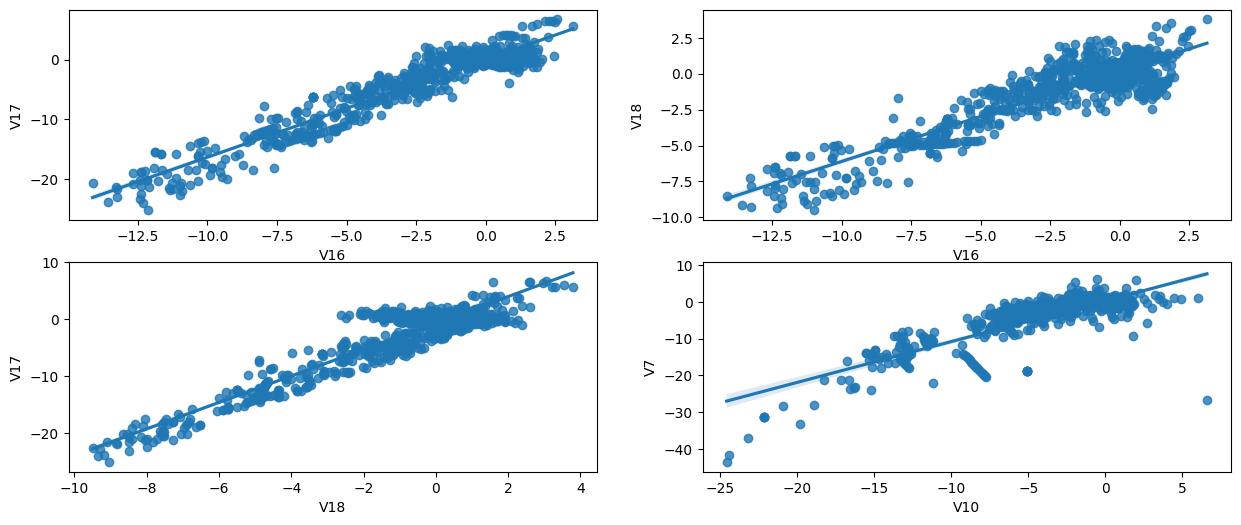

In [32]:
fig = plt.figure(figsize=(15,6))

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

sns.regplot(df_resampled, x="V16", y="V17", ax=ax0)
sns.regplot(df_resampled, x="V16", y="V18", ax=ax1)
sns.regplot(df_resampled, x="V18", y="V17", ax=ax2)
sns.regplot(df_resampled, x="V10", y="V7", ax=ax3)


In [33]:
def calculate_vif(df):
    # Only include numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Compute VIF
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df_numeric.columns
    vif_data["VIF"] = [
        variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])
    ]
    return vif_data

In [34]:
vif = calculate_vif(df_resampled)
len(vif[vif["VIF"] < 10])

19

In [35]:
X = df_resampled.copy()
y = X.pop("Class")

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
important_features = [feature for feature, importance in zip(X.columns, importances) if importance > 0.01]

In [36]:
print(important_features)
print(len(important_features))

['V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V19', 'V21', 'V27', 'Amount_scaled']
15


In [37]:
print(importances)
print(len(importances))

[0.00607073 0.02243174 0.07837051 0.08206181 0.0066668  0.00693267
 0.02549363 0.00846176 0.01147958 0.11261854 0.06741682 0.07939907
 0.0083595  0.21632285 0.00547386 0.03961578 0.11051651 0.00910362
 0.01162516 0.00987647 0.01494143 0.00723438 0.00662122 0.00531172
 0.00577587 0.00628249 0.01366497 0.00658973 0.00420737 0.01107343]
30


In [38]:
mi_scores = mutual_info_classif(X, y)
mi_features = pd.Series(mi_scores, index=pd.DataFrame(X).columns)
selected_features = mi_features[mi_features > 0.01].index  # Keep significant features
X_mi = pd.DataFrame(X)[selected_features]
X_mi

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time_scaled,Amount_scaled
202750,-2.552505,-1.705605,1.996038,2.703015,1.606230,-0.903653,0.453577,-0.373634,0.020083,0.890720,...,-0.219753,0.309641,1.371487,0.323379,0.285560,-0.010155,-0.494952,0.080108,-0.512073,0.009915
107606,-2.967013,-2.408599,0.970375,-2.509918,0.454324,0.527707,-0.630929,0.120913,-1.707194,1.631025,...,-0.534997,0.372650,0.734514,-1.711519,0.853537,-0.042997,0.046193,-0.693625,-0.542088,0.921659
2700,-0.498446,0.727929,1.232917,-0.752257,0.608606,-0.177303,0.876031,-0.073569,-0.184107,-1.124417,...,0.033948,0.127438,-0.341233,0.700797,0.946494,-0.246634,-0.060403,-0.049666,0.977210,0.179584
45813,-0.967767,2.098019,-5.222929,6.514573,-4.187674,2.114178,0.948701,-2.448427,-3.203666,-3.074034,...,-0.843268,0.796739,1.314312,-0.352887,-1.770706,0.098133,0.956769,0.162777,0.588267,12.614300
143398,-0.469327,1.111453,2.041003,1.731595,0.135147,-0.093625,0.266155,0.082988,0.580255,-0.164563,...,0.159387,0.592670,-0.053596,0.320748,-0.369121,-0.136605,-0.100845,0.039347,-0.792506,-0.252339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155589,1.837048,-0.689038,-2.816625,-0.613723,0.323765,-1.926953,1.139292,-0.705145,0.505832,-0.264621,...,0.352363,0.791612,-0.344860,-0.047718,0.536245,1.067918,-0.186542,-0.073053,0.768753,2.320905
4278,2.031374,0.166222,-1.491292,0.528652,0.202214,-1.086141,0.182665,-0.244312,0.454466,-0.387828,...,-0.325446,-0.825634,0.409349,0.993142,-0.339912,0.145322,-0.058627,-0.025906,0.867560,-0.289205
223703,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,-11.519861,...,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,-0.511145,-0.148303
175772,1.548517,-2.105920,-0.995285,-0.713725,-1.310823,-0.158173,-0.755785,-0.069523,0.207778,0.629965,...,0.565283,0.855585,-0.151798,0.507866,-0.288646,-0.116346,-0.056690,0.015908,0.801434,4.507750


In [39]:
from sklearn.feature_selection import VarianceThreshold

X_vt = VarianceThreshold(threshold=0.01).fit_transform(X)
X_vt

array([[-2.55250478, -1.7056049 ,  1.99603819, ...,  0.08010762,
        -0.51207335,  0.00991482],
       [-2.9670128 , -2.40859873,  0.97037546, ..., -0.69362539,
        -0.54208786,  0.92165899],
       [-0.49844591,  0.72792867,  1.23291686, ..., -0.04966617,
         0.97721012,  0.17958386],
       ...,
       [-7.33434102,  4.96089229, -8.45140959, ...,  0.3156448 ,
        -0.51114531, -0.14830331],
       [ 1.54851732, -2.10592012, -0.9952853 , ...,  0.01590757,
         0.80143435,  4.50775031],
       [ 2.04585538, -0.1929034 , -0.69858344, ..., -0.02714851,
         0.92662598, -0.1886608 ]], shape=(934, 30))

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

classifiers = {
    "LogisticRegression":LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier(),
    "SVM":SVC()
}

for key,classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    train_score = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
    print(f"Classifier: {classifier} training score: {train_score.mean()}.")


Classifier: LogisticRegression() training score: 0.9437762863534676.
Classifier: RandomForestClassifier() training score: 0.9397762863534675.
Classifier: SVC() training score: 0.9277136465324386.


In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [43]:
logreg_params ={'C':[0.001,0.01,0.1,1],
             'penalty':['l1','l2'],
             'solver':['lbfgs']}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,logreg_params, cv=5)
logreg_cv.fit(X_train, y_train)

/Users/boitumelomaseko/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/boitumelomaseko/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/boitumelomaseko/.local/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boitumelomaseko/.local/lib/python3.11/site-packages/skle

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs']})

In [44]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9464519015659955


In [45]:
logreg_yhat = logreg_cv.predict(X_test)
logreg_cm = confusion_matrix(y_true=y_test, y_pred=logreg_yhat)
logreg_cm

array([[102,   1],
       [  5,  79]])

In [46]:
print(classification_report(y_test, logreg_yhat))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       103
           1       0.99      0.94      0.96        84

    accuracy                           0.97       187
   macro avg       0.97      0.97      0.97       187
weighted avg       0.97      0.97      0.97       187



In [47]:
rf_params = {'criterion': ['gini', 'entropy','log_loss'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, rf_params, cv=10)
rf_cv.fit(X_train, y_train)

print("tuned hyperparameters :(best parameters) ",rf_cv.best_params_)
print("accuracy :",rf_cv.best_score_)

KeyboardInterrupt: 

In [58]:
rf_yhat = rf_cv.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_yhat)
rf_cm

array([[110,   0],
       [ 14,  73]])

In [59]:
print(classification_report(y_test, rf_yhat))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       110
           1       1.00      0.84      0.91        87

    accuracy                           0.93       197
   macro avg       0.94      0.92      0.93       197
weighted avg       0.94      0.93      0.93       197

